In [ ]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=3e8f14ecc25f4f39373c9ee8aecb8c90c3c6aeb5acf1f26a06f7cd26ca7228b9
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta


data = pd.read_csv("btcusdt_15m.csv")
data.head()

,datetime,open,high,low,close,volume
0,2018-01-01 05:30:00,13715.65,13715.65,13400.01,13556.15,123.616013
1,2018-01-01 05:45:00,13533.75,13550.87,13402.00,13521.12,98.136430
2,2018-01-01 06:00:00,13500.00,13545.37,13450.00,13470.41,79.904037
3,2018-01-01 06:15:00,13494.65,13690.87,13450.00,13529.01,141.699719
4,2018-01-01 06:30:00,13528.99,13571.74,13402.28,13445.63,72.537533


In [ ]:
def calculate_ema(data, period):
       ema = np.zeros_like(data)
       multiplier = 2 / (period + 1)
       ema[period - 1] = np.mean(data[:period])
       for i in range(period, len(data)):
           ema[i] = (data[i] - ema[i - 1]) * multiplier + ema[i - 1]
       return ema
short_ema = calculate_ema(data['close'], 12)
long_ema = calculate_ema(data['close'], 26)

 #sell condition
#ulta kar buy condition

In [ ]:
# Adding indicators
data['RSI']=ta.rsi(data.close, length=15)
data['SMA']=ta.sma(data.close, length=20)
data['MACD'] = [(short_ema[i] - long_ema[i]) for i in range(len(data))]
data['SignalLine'] = calculate_ema(data['MACD'], 9)
#data['MACD']=ta.macd(data.close, window_slow=26, window_fast=12, fillna=True)
# macd_df= macd(data.close)
# fast_ma = get_macd_fast_ma(macd_df)
# slow_ma = get_macd_slow_ma(macd_df)
#data['BB']=ta.bbands(data.close, length=20, std=2, mamode="sma", ddof=0)

#data['BUY'] = [1 if (data['RSI'][i] < 40) and ( data['SMA'][i] < data['close'][i]) and (data['MACD'][i] < data['SignalLine'][i]) else 0 for i in range(len(data))] #Agar ye class satisfy to buy
#data['SELL'] = [1 if (data['RSI'][i] > 60) and ( data['SMA'][i] > data['close'][i]) and (data['MACD'][i] > data['SignalLine'][i]) else 0 for i in range(len(data))] #Agar ye class satisfy to sell


data['BUY'] = [1 if (data['RSI'][i] > 85 )  and (data['SMA'][i] < data['close'][i]) else 0 for i in range(len(data))] #Agar ye class satisfy to buy
data['SELL'] = [1 if (data['RSI'][i] < 30)  and (data['SMA'][i] > data['close'][i]) else 0 for i in range(len(data))] #Agar ye class satisfy to sell

data['TargetClass'] = [1 if data['BUY'][i] == 1 else -1 if data['SELL'][i] == 1 else 0 for i in range(len(data))]
#data['TargetClass'] = [1 if data['BUY'][i]==1 -1 elif data['SELL'][i]==1 else 0 for i in range(len(data))]
#data['TargetClass'] = [-1 if data['SELL'][i]==1 for i in range(len(data))]
#data['TargetNextClose'] = data['close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data1 = data['datetime']
data.drop(['datetime'], axis=1, inplace=True)

In [ ]:
data_set = data.iloc[:, 0:13]#.values
pd.set_option('display.max_columns', None)

data_set.head(2000)

#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,index,open,high,low,close,volume,RSI,SMA,MACD,SignalLine,BUY,SELL,TargetClass
0,19,13507.41,13623.29,13465.41,13601.01,106.540951,56.718381,13439.8085,13466.623856,11639.138938,0,0,0
1,20,13615.20,13677.83,13552.02,13627.14,185.935937,57.855669,13443.3580,13491.318647,12009.574880,0,0,0
2,21,13600.00,13699.00,13532.57,13618.51,103.502867,57.322668,13448.2275,13510.886548,12309.837213,0,0,0
3,22,13618.51,13629.00,13530.00,13580.01,70.523393,54.904945,13453.7075,13521.520925,12552.173956,0,0,0
4,23,13558.95,13600.00,13526.50,13558.99,44.266849,53.582914,13455.2065,13527.285398,12747.196244,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2014,11581.18,11602.37,11420.00,11502.25,330.348588,53.416022,11326.1565,65.343909,19.119185,0,0,0
1996,2015,11528.39,11558.32,11310.00,11393.98,268.910915,49.436698,11341.8550,54.066737,26.108695,0,0,0
1997,2016,11379.99,11420.00,11339.01,11370.38,206.353112,48.591295,11358.8760,42.732580,29.433472,0,0,0
1998,2017,11381.01,11381.01,11211.00,11288.39,364.770692,45.683364,11365.8505,26.825049,28.911787,0,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)
print(data_set_scaled.shape)
print(data1)

[[0.00000000e+00 6.70658107e-01 6.78031625e-01 ... 0.00000000e+00
  0.00000000e+00 5.00000000e-01]
 [1.00210442e-04 6.80340142e-01 6.82974040e-01 ... 0.00000000e+00
  0.00000000e+00 5.00000000e-01]
 [2.00420884e-04 6.78974831e-01 6.84892466e-01 ... 0.00000000e+00
  0.00000000e+00 5.00000000e-01]
 ...
 [9.99799579e-01 1.74617960e-01 1.67499314e-01 ... 0.00000000e+00
  0.00000000e+00 5.00000000e-01]
 [9.99899790e-01 1.73628109e-01 1.67361571e-01 ... 0.00000000e+00
  0.00000000e+00 5.00000000e-01]
 [1.00000000e+00 1.73269715e-01 1.66636611e-01 ... 0.00000000e+00
  0.00000000e+00 5.00000000e-01]]
(9980, 13)
0       2018-01-01 10:15:00
1       2018-01-01 10:30:00
2       2018-01-01 10:45:00
3       2018-01-01 11:00:00
4       2018-01-01 11:15:00
               ...         
9975    2018-04-16 19:45:00
9976    2018-04-16 20:00:00
9977    2018-04-16 20:15:00
9978    2018-04-16 20:30:00
9979    2018-04-16 20:45:00
Name: datetime, Length: 9980, dtype: object


In [ ]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values

backcandles = 30
print(data_set_scaled.shape[0])
for j in range(10):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


print(X.shape)
print(X)
print()
print(y.shape)
print(y)

9980
(9950, 30, 10)
[[[0.00000000e+00 6.70658107e-01 6.78031625e-01 ... 6.72823543e-01
   9.95621116e-01 9.04818448e-01]
  [1.00210442e-04 6.80340142e-01 6.82974040e-01 ... 6.73154272e-01
   9.97381248e-01 9.32707888e-01]
  [2.00420884e-04 6.78974831e-01 6.84892466e-01 ... 6.73607994e-01
   9.98775958e-01 9.55314086e-01]
  ...
  [2.70568193e-03 6.29573906e-01 6.41967578e-01 ... 6.82011802e-01
   3.07847904e-02 3.49688939e-02]
  [2.80589237e-03 6.37012159e-01 6.41744653e-01 ... 6.79403563e-01
   3.00839442e-02 3.24772010e-02]
  [2.90610282e-03 6.44892342e-01 6.48735081e-01 ... 6.76945618e-01
   2.97524448e-02 3.04138142e-02]]

 [[1.00210442e-04 6.80340142e-01 6.82974040e-01 ... 6.73154272e-01
   9.97381248e-01 9.32707888e-01]
  [2.00420884e-04 6.78974831e-01 6.84892466e-01 ... 6.73607994e-01
   9.98775958e-01 9.55314086e-01]
  [3.00631326e-04 6.80637457e-01 6.78549065e-01 ... 6.74118601e-01
   9.99533928e-01 9.73559173e-01]
  ...
  [2.80589237e-03 6.37012159e-01 6.41744653e-01 ... 6.794

In [ ]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

for i in range(len(y_train)):
    if(y_train[i]==1):
      y_train[i] = 1
    elif(y_train[i]==0.5):
      y_train[i] = 0
    else:
      y_train[i] = -1

for i in range(len(y_test)):
    if(y_test[i]==1):
      y_test[i] = 1
    elif(y_test[i]==0.5):
      y_test[i] = 0
    else:
      y_test[i] = -1

print("________")
print(y_train)
print("________")
print(y_test)

7960
(7960, 30, 10)
(1990, 30, 10)
(7960, 1)
(1990, 1)
________
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
________
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
from keras.models import load_model
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 10), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=10, shuffle=True, validation_split = 0.1)
model.save('C:\\Users\\ravi shirsat\\Desktop\\ML projects\\Crypto(Inter-Iit)\\model.h5')


Epoch 1/10
478/478 [==============================] - 18s 31ms/step - loss: 0.0304 - val_loss: 0.0318
Epoch 2/10
478/478 [==============================] - 14s 30ms/step - loss: 0.0274 - val_loss: 0.0288
Epoch 3/10
478/478 [==============================] - 14s 30ms/step - loss: 0.0258 - val_loss: 0.0264
Epoch 4/10
478/478 [==============================] - 14s 30ms/step - loss: 0.0240 - val_loss: 0.0283
Epoch 5/10
478/478 [==============================] - 14s 30ms/step - loss: 0.0235 - val_loss: 0.0261
Epoch 6/10
478/478 [==============================] - 14s 29ms/step - loss: 0.0223 - val_loss: 0.0257
Epoch 7/10
478/478 [==============================] - 15s 31ms/step - loss: 0.0225 - val_loss: 0.0257
Epoch 8/10
478/478 [==============================] - 14s 30ms/step - loss: 0.0219 - val_loss: 0.0250
Epoch 9/10
478/478 [==============================] - 14s 29ms/step - loss: 0.0216 - val_loss: 0.0252
Epoch 10/10
478/478 [==============================] - 15s 32ms/step - loss: 0.020

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(len(y_pred)):
    if(y_pred[i]>0.25):
      y_pred[i] = 1
    elif(y_test[i]<-0.5):
      y_pred[i] = -1
    else:
      y_pred[i] = 0

print(y_pred)
print(y_test)


63/63 [==============================] - 1s 13ms/step
[[0.]
 [1.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


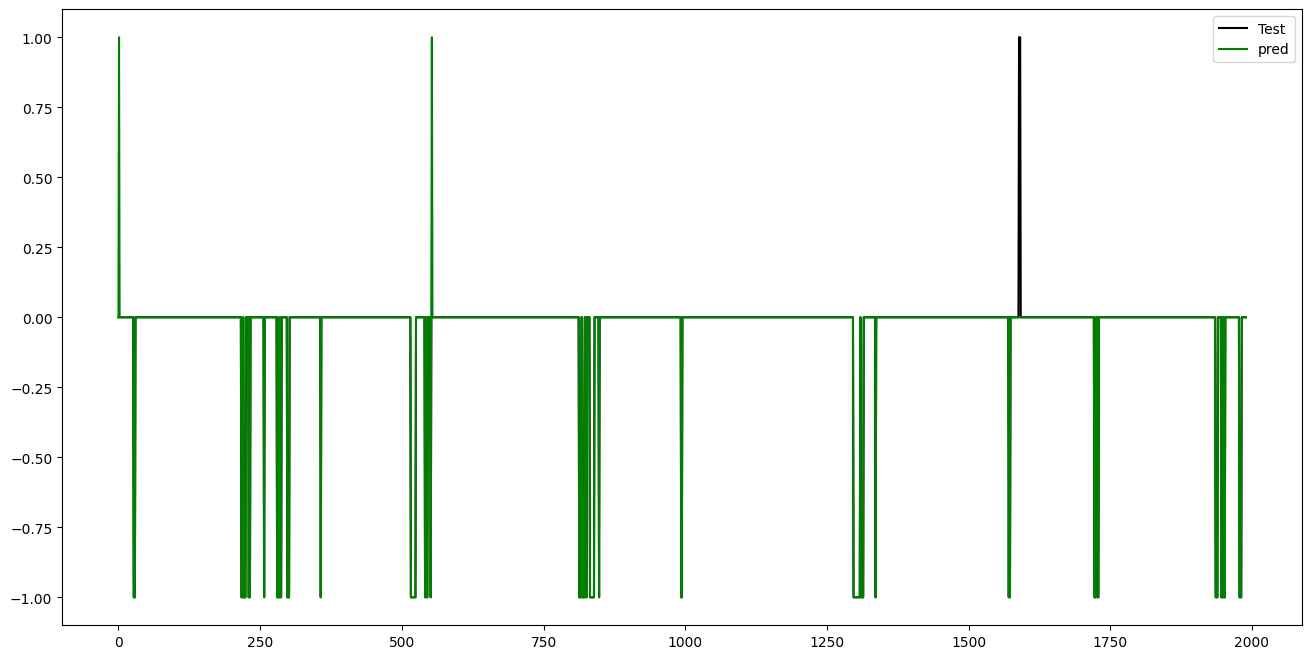

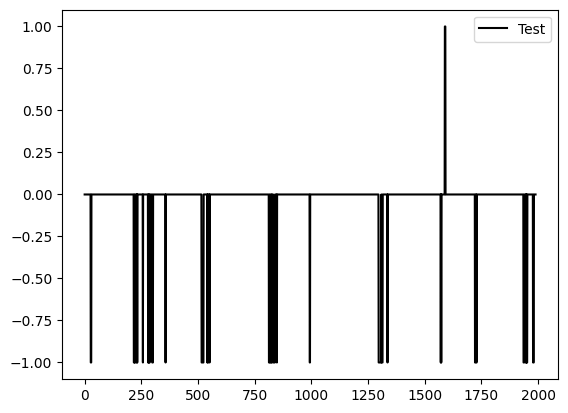

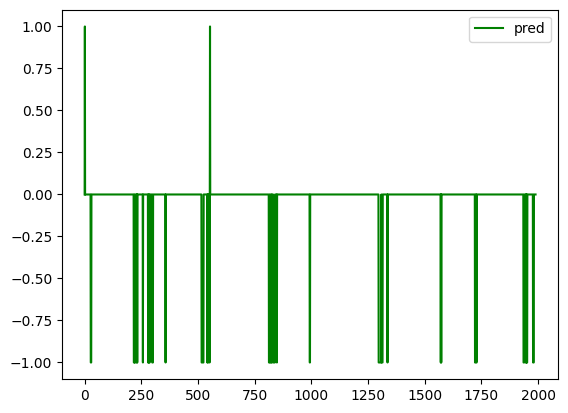

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()
plt.plot(y_test, color = 'black', label = 'Test')
plt.legend()
plt.show()
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

In [ ]:
# dictionary of lists
ytest = y_test.reshape(-1)
ypred = y_pred.reshape(-1)

dict = {'y_test': ytest, 'TradeSignal': ypred}

df = pd.DataFrame(dict)


# Calculate the index from which to select the last 20%
index_to_select = int(0.8 * len(data1))
# Select the last 20% of the datetime column from df1
datetime_to_add = data1.iloc[index_to_select+6:]
df['datetime'] = datetime_to_add.values

low_to_add = data.iloc[:,3]
df['low'] = low_to_add.iloc[index_to_select+6:].values

open_to_add = data.iloc[:,1]
df['open'] = open_to_add.iloc[index_to_select+6:].values

high_to_add = data.iloc[:,2]
df['high'] = high_to_add.iloc[index_to_select+6:].values

close_to_add = data.iloc[:,4]
df['close'] = close_to_add.iloc[index_to_select+6:].values

volume_to_add = data.iloc[:,5]
df['volume'] = volume_to_add.iloc[index_to_select+6:].values


# Add the selected datetime values to df2
#df2['datetime'] = datetime_to_add.values

df.to_csv('ytest1.csv')
df

,y_test,TradeSignal,datetime,low,open,high,close,volume
0,0.0,0.0,2018-03-27 03:30:00,7866.05,7880.01,8181.93,8170.00,1480.670921
1,0.0,1.0,2018-03-27 03:45:00,8108.30,8170.00,8249.00,8172.00,1570.385996
2,0.0,0.0,2018-03-27 04:00:00,8138.00,8181.00,8207.97,8171.00,843.736047
3,0.0,0.0,2018-03-27 04:15:00,8163.11,8171.00,8207.95,8195.65,398.492502
4,0.0,0.0,2018-03-27 04:30:00,8162.01,8195.65,8205.04,8198.00,410.164850
...,...,...,...,...,...,...,...,...
1985,0.0,0.0,2018-04-16 19:45:00,7907.00,7925.01,7961.00,7959.02,339.971636
1986,0.0,0.0,2018-04-16 20:00:00,7948.99,7959.91,7999.00,7985.00,389.228808
1987,0.0,0.0,2018-04-16 20:15:00,7960.51,7985.00,7989.52,7973.98,319.728110
1988,0.0,0.0,2018-04-16 20:30:00,7963.00,7973.98,7988.00,7970.13,227.063680
